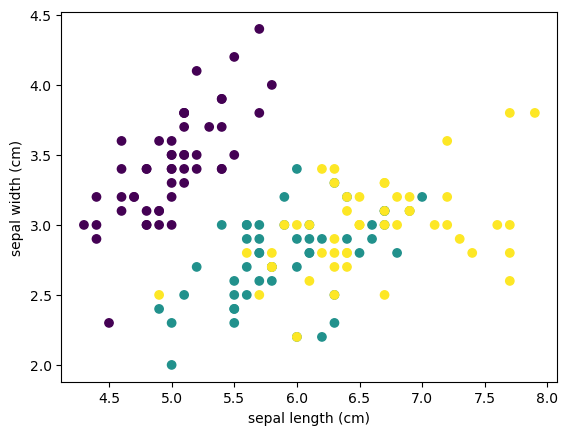

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt


# Carregando o conjunto de dados
iris_dataset = datasets.load_iris()
iris_features = [0, 1]
iris_data = iris_dataset.data[:, iris_features]

# Criando o gráfico de dispersão
plt.scatter(iris_dataset.data[:, 0], iris_dataset.data[:, 1], c=iris_dataset.target)
plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])
plt.show()

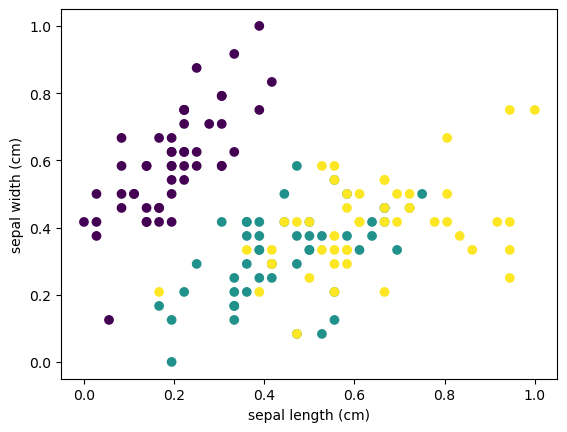

In [2]:
# Preprocessar os dados 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(iris_data)

plt.scatter(data[:, 0], data[:, 1], c=iris_dataset.target)
plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])
plt.show()

In [3]:
from torch import Tensor
import numpy

def plot_sepal(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    spacing = min(x_max - x_min, y_max - y_min) / 100

    XX, YY = numpy.meshgrid(numpy.arange(x_min, x_max, spacing),
                            numpy.arange(y_min, y_max, spacing))

    data = numpy.hstack((XX.ravel().reshape(-1, 1), YY.ravel().reshape(-1, 1)))

    db_prob = model(Tensor(data))
    clf = numpy.argmax(db_prob.cpu().detach().numpy(), axis=1)

    Z = clf.reshape(XX.shape)

    plt.contourf(XX, YY, Z, cmap='brg', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='brg')
    plt.show()


In [4]:
from torch import nn

input_size = data.shape[1]
hidden_size1 = 50
out_size = len(iris_dataset.target_names)

net = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.LeakyReLU(),  
    nn.Linear(hidden_size1, out_size),
    nn.Softmax()
)


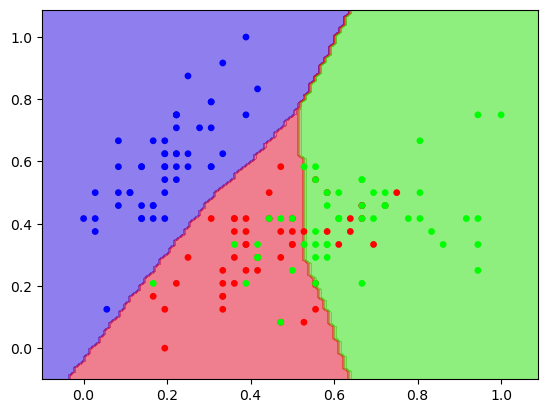

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]             150
         LeakyReLU-2                   [-1, 50]               0
            Linear-3                    [-1, 3]             153
           Softmax-4                    [-1, 3]               0
Total params: 303
Trainable params: 303
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [8]:
from torchsummary import summary
from IPython.display import clear_output
from torch import optim
import torch

targets = iris_dataset.target
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = net.to(device)

#Definindo funções de otimização
X = torch.FloatTensor(data)
Y = torch.LongTensor(targets)

X = X.to(device)
Y = Y.to(device)

#Função de perda
criterion = nn.CrossEntropyLoss()

#Otimizador 
optimizer = optim.SGD(net.parameters(), lr=0.01, weight_decay=0.01)

#Treinamento
for i in range(1000):
    pred = net(X)
    loss = criterion(pred, Y)

    loss.backward()
    optimizer.step()

    def plot_10():
        if i % 1 == 0:
            clear_output(wait=True)  # Limpa a saída do bloco de anotações
            plt.figure()
            plot_sepal(data, targets, net.to('cpu'))  # Move o modelo de volta para a CPU para plotar

    plot_10()

    net = net.to(device)  # Move o modelo de volta para a GPU para continuar o treinamento

summary(net, input_size=(input_size,))